<a href="https://colab.research.google.com/github/mauryasameer/Malaria_detection/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
import os
os.getcwd()

'/content'

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mauryasameer47","key":"1a3e06f6f2640e6dd9410c7debeb6501"}'}

In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/kaggle/kaggle.json

In [15]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56           6621  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           1471  
jessicali9530/stanford-dogs-dataset                          Stanford Dogs Dataset                               735MB  2019-02-13 05:45:25            242  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25           5023  
vjchoudhary7/customer-segmentation-tutorial-in-python     

In [25]:
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

 98% 330M/337M [00:03<00:00, 82.5MB/s]
100% 337M/337M [00:03<00:00, 94.3MB/s]


In [0]:
!mkdir data

In [35]:
!unzip cell-images-for-detecting-malaria.zip -d data

Archive:  cell-images-for-detecting-malaria.zip
   creating: data/cell_images/
   creating: data/cell_images/Parasitized/
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_

In [42]:
os.listdir(path)

['Uninfected', 'Parasitized']

In [0]:
path = './data/cell_images/'

In [0]:
data = ImageDataBunch.from_folder(path=path,valid_pct=0.2,ds_tfms=get_transforms(flip_vert=True,max_warp=0),size=224,bs=64)

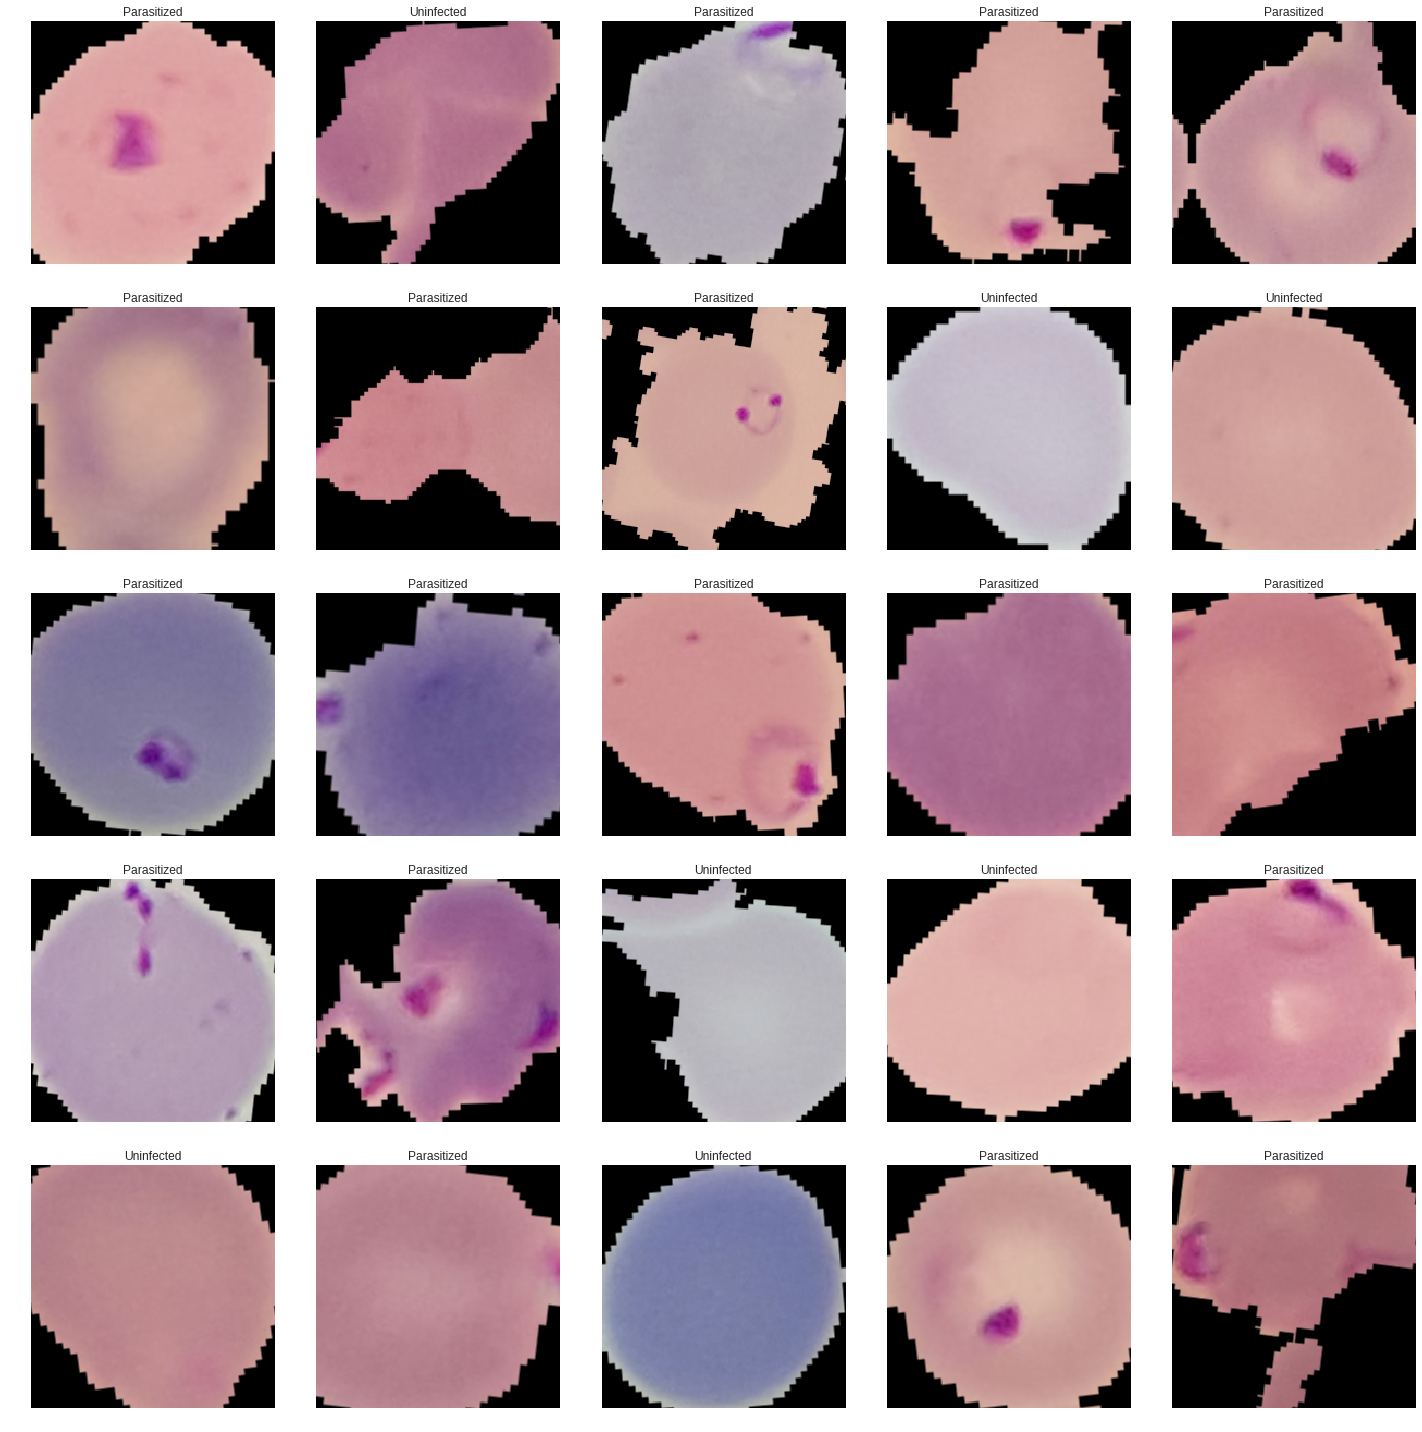

In [44]:
data.show_batch(row)

In [46]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (22047 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: data/cell_images;

Valid: LabelList (5511 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Uninfected,Parasitized,Parasitized,Parasitized
Path: data/cell_images;

Test: None

In [0]:
learn = create_cnn(data,models.resnet50,metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-04


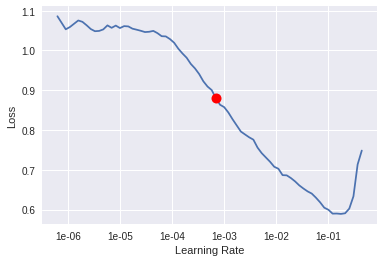

In [49]:
learn.lr_find()
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(4)

In [0]:
learn.save('malerai-v1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07


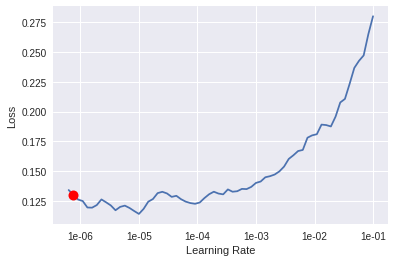

In [53]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(5,max_lr=slice(1e-06,1e-05))

In [0]:
learn.save('maleria-v2')

In [0]:
infer = ClassificationInterpretation.from_learner(learn)

In [62]:
infer.confusion_matrix()

array([[2651,   90],
       [  85, 2685]])

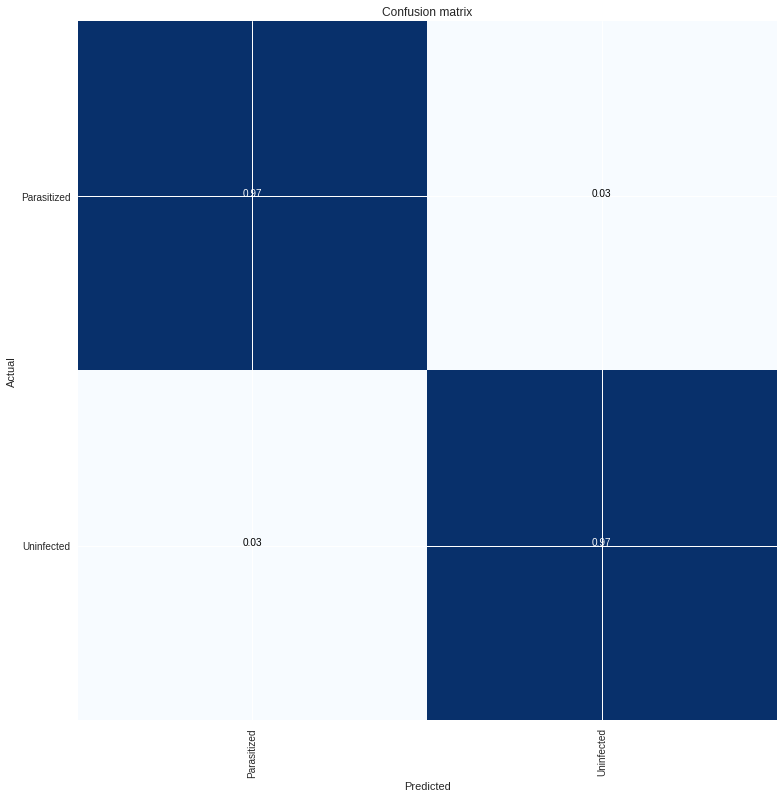

In [65]:
infer.plot_confusion_matrix(9,figsize=(15,11))

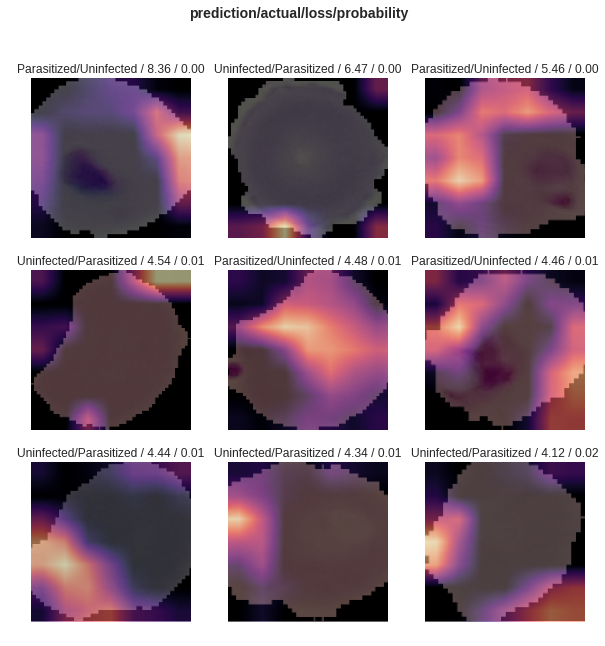

In [69]:
infer.plot_top_losses(9,figsize=(10,10))